In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, '..', '..'))
sys.path.append(parent_dir)
from src.utils import calculate_eer


In [139]:
csv_path = os.path.join(parent_dir, 'data', 'scores', 'adaface_eval_aligned_base_scores.csv')
# csv_path = os.path.join(parent_dir, 'test.csv')

In [140]:
data = pd.read_csv(csv_path)

In [141]:
results_json = {}

Text(0.5, 1.0, 'Adaface - same (1) and different (0) people embeddings similarity')

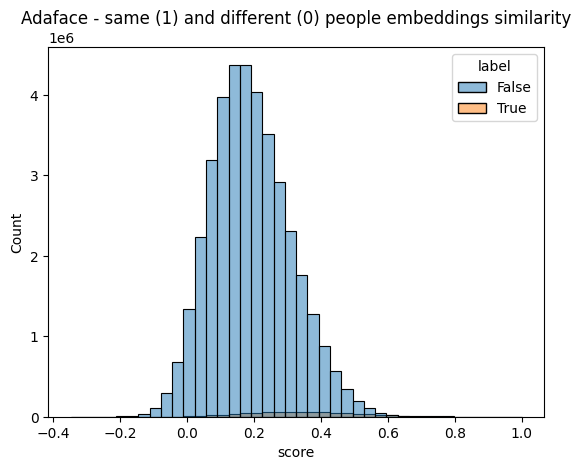

In [142]:
sns.histplot(data = data, x = 'score', hue='label',bins = 40)
plt.title('Adaface - same (1) and different (0) people embeddings similarity')

In [143]:
same_person = data[data['label'] == 1]
diff_person = data[data['label'] == 0]

In [144]:
print(f"Same person mean: {same_person['score'].mean()}")
print(f'Same person std: {same_person["score"].std()}')
print(f"Diff person mean: {diff_person['score'].mean()}")
print(f'Diff person std: {diff_person["score"].std()}')

Same person mean: 0.35304429498311973
Same person std: 0.1630637517468825
Diff person mean: 0.1909731278378783
Diff person std: 0.11881068065940577


In [145]:
results_json['eval'] = {}
results_json['eval']['similarity_distribution'] = {}

In [146]:
results_json['eval']['similarity_distribution']['same_person_mean'] = round(same_person['score'].mean(), 6)
results_json['eval']['similarity_distribution']['same_person_std'] = round(same_person['score'].std(), 6)
results_json['eval']['similarity_distribution']['diff_person_mean'] = round(diff_person['score'].mean(), 6)
results_json['eval']['similarity_distribution']['diff_person_std'] = round(diff_person['score'].std(), 6)

In [147]:
results_json

{'eval': {'similarity_distribution': {'same_person_mean': 0.353044,
   'same_person_std': 0.163064,
   'diff_person_mean': 0.190973,
   'diff_person_std': 0.118811}}}

In [148]:
thresholds = np.linspace(-0.4, 1, 141)

In [149]:
accs = []
f1s = []
precs = []
recs = []
fars = []
frrs = []

In [150]:
ground_truth = data['label']
for t in thresholds:
    decisions = data['score'] > t
    acc = accuracy_score(ground_truth, decisions)
    f1 = f1_score(ground_truth, decisions)
    prec = precision_score(ground_truth, decisions)
    rec = recall_score(ground_truth, decisions)
    FP = np.sum((ground_truth == 0) & (decisions == 1))
    FN = np.sum((ground_truth == 1) & (decisions == 0))
    TP = np.sum((ground_truth == 1) & (decisions == 1))
    TN = np.sum((ground_truth == 0) & (decisions == 0))
    FAR = FP / (FP + TN)
    FRR = FN / (FN + TP)
    fars.append(FAR)
    frrs.append(FRR)
    accs.append(acc)
    f1s.append(f1)
    precs.append(prec)
    recs.append(rec)
    

In [151]:
threshold, eer = calculate_eer(thresholds, fars, frrs)

In [152]:
print(threshold, eer)

0.25307651674932374 0.2856788604513354


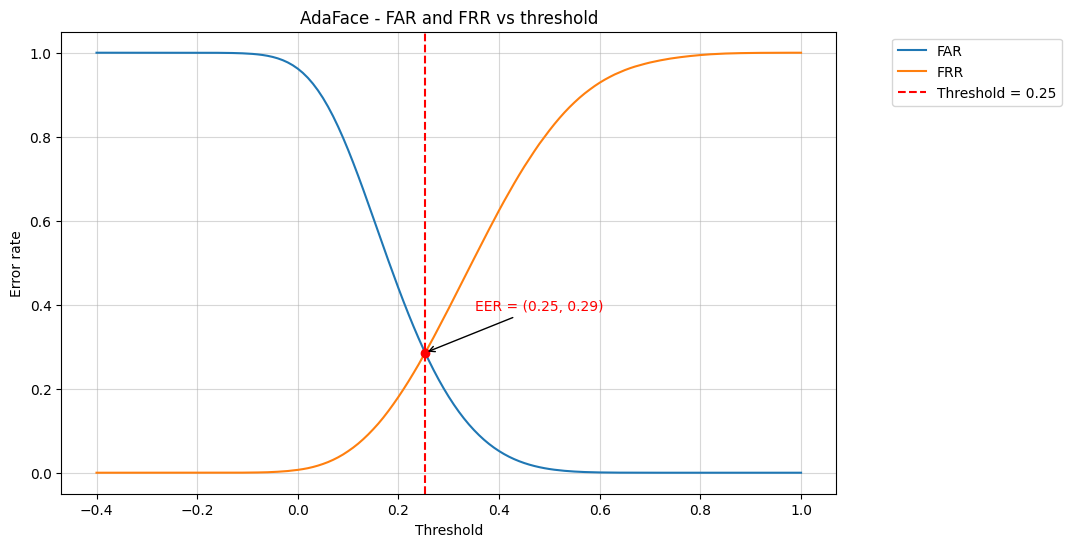

In [153]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, fars, label='FAR')
plt.plot(thresholds, frrs, label='FRR')
plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold = {threshold:.2f}')
plt.scatter(threshold, eer, color='red', zorder=2)
plt.annotate(
    f'EER = ({threshold:.2f}, {eer:.2f})', 
    xy=(threshold, eer), 
    xytext=(threshold + np.max(thresholds)/10, eer + 0.1),  # Adjust text position
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    fontsize=10,
    color='red'
)
plt.title('AdaFace - FAR and FRR vs threshold')
plt.xlabel('Threshold')
plt.ylabel('Error rate')
plt.grid(alpha=0.5)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

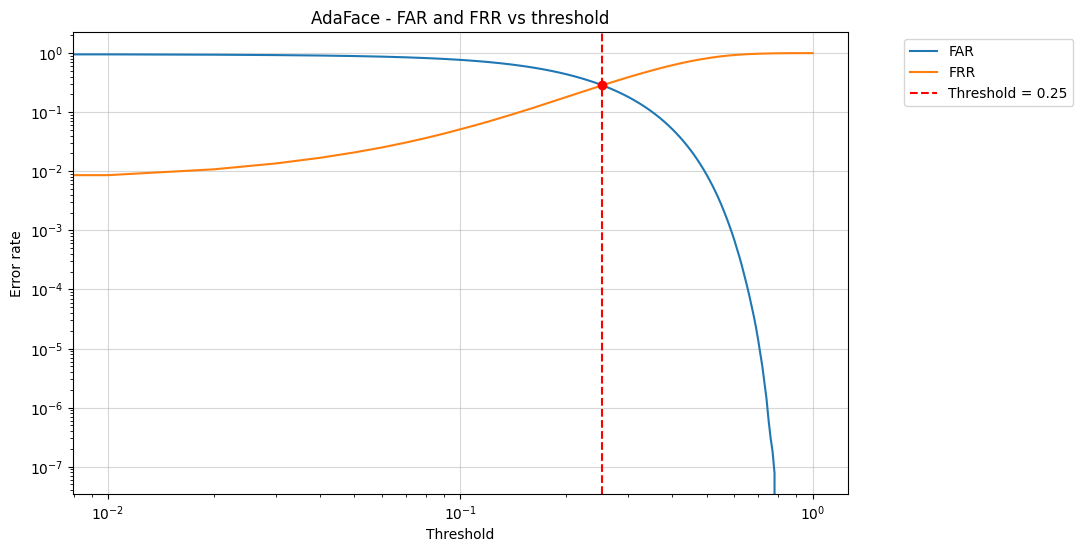

In [154]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, fars, label='FAR')
plt.plot(thresholds, frrs, label='FRR')
plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold = {threshold:.2f}')
plt.scatter(threshold, eer, color='red', zorder=2)
plt.title('AdaFace - FAR and FRR vs threshold')
plt.xlabel('Threshold')
plt.ylabel('Error rate')
plt.xscale('log')
plt.yscale('log')
plt.grid(alpha=0.5)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

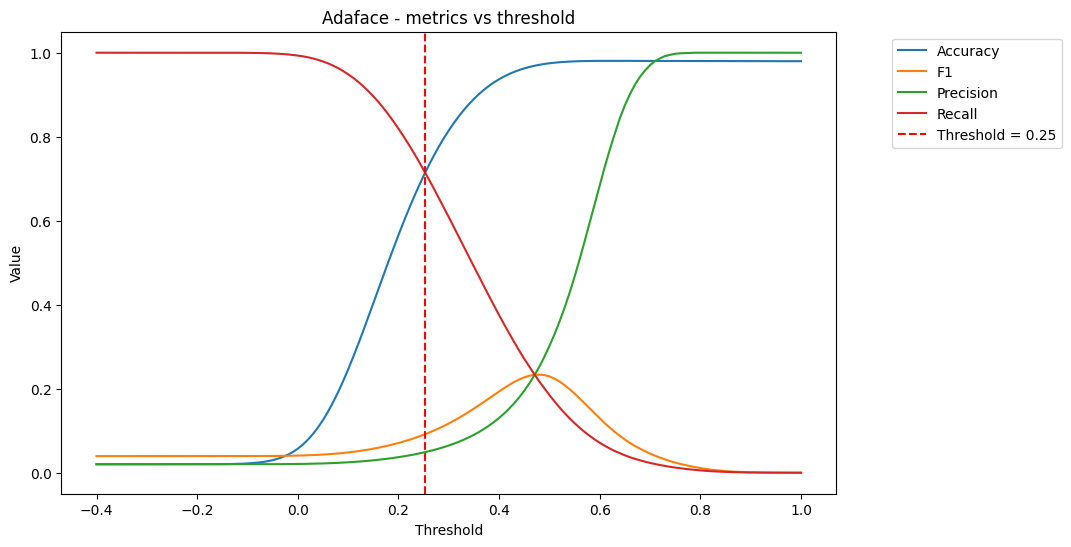

In [155]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accs, label='Accuracy')
plt.plot(thresholds, f1s, label='F1')
plt.plot(thresholds, precs, label='Precision')
plt.plot(thresholds, recs, label='Recall')
plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold = {threshold:.2f}')
plt.title('Adaface - metrics vs threshold')
plt.xlabel('Threshold')
plt.ylabel('Value')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

In [156]:
decisions = data['score'] > threshold
acc = accuracy_score(ground_truth, decisions)
f1 = f1_score(ground_truth, decisions)
prec = precision_score(ground_truth, decisions)
rec = recall_score(ground_truth, decisions)
FP = np.sum((ground_truth == 0) & (decisions == 1))
FN = np.sum((ground_truth == 1) & (decisions == 0))
TP = np.sum((ground_truth == 1) & (decisions == 1))
TN = np.sum((ground_truth == 0) & (decisions == 0))
FAR = FP / (FP + TN)
FRR = FN / (FN + TP)
print(f'Accuracy: {round(acc, 5)}')
print(f'F1: {round(f1, 5)}')
print(f'Precision: {round(prec, 5)}')
print(f'Recall: {round(rec, 5)}')
print(f'FAR: {round(FAR, 7)}')
print(f'FRR: {round(FRR, 5)}')

Accuracy: 0.71447
F1: 0.09171
Precision: 0.049
Recall: 0.71439
FAR: 0.2855243
FRR: 0.28561


In [157]:
results_json 

{'eval': {'similarity_distribution': {'same_person_mean': 0.353044,
   'same_person_std': 0.163064,
   'diff_person_mean': 0.190973,
   'diff_person_std': 0.118811}}}

In [158]:
results_json['eval']['metrics'] = {}
results_json['eval']['metrics']['accuracy'] = round(acc, 6)
results_json['eval']['metrics']['f1'] = round(f1, 6)
results_json['eval']['metrics']['precision'] = round(prec, 6)
results_json['eval']['metrics']['recall'] = round(rec, 6)
results_json['eval']['metrics']['far'] = round(FAR, 6)
results_json['eval']['metrics']['frr'] = round(FRR, 6)
results_json['eval']['metrics']['eer'] = round(eer, 6)
results_json['eval']['threshold'] = round(threshold, 6)

In [159]:
results_json

{'eval': {'similarity_distribution': {'same_person_mean': 0.353044,
   'same_person_std': 0.163064,
   'diff_person_mean': 0.190973,
   'diff_person_std': 0.118811},
  'metrics': {'accuracy': 0.714474,
   'f1': 0.091712,
   'precision': 0.049001,
   'recall': 0.714389,
   'far': 0.285524,
   'frr': 0.285611,
   'eer': 0.285679},
  'threshold': 0.253077}}

## Test

In [160]:
csv_path = os.path.join(parent_dir, 'data', 'scores', 'adaface_test_aligned_base_scores.csv')
data = pd.read_csv(csv_path)

In [161]:
ground_truth = data['label']

In [162]:
decisions = data['score'] > threshold
acc = accuracy_score(ground_truth, decisions)
f1 = f1_score(ground_truth, decisions)
prec = precision_score(ground_truth, decisions)
rec = recall_score(ground_truth, decisions)
FP = np.sum((ground_truth == 0) & (decisions == 1))
FN = np.sum((ground_truth == 1) & (decisions == 0))
TP = np.sum((ground_truth == 1) & (decisions == 1))
TN = np.sum((ground_truth == 0) & (decisions == 0))
FAR = FP / (FP + TN)
FRR = FN / (FN + TP)
print(f'Accuracy: {round(acc, 5)}')
print(f'F1: {round(f1, 5)}')
print(f'Precision: {round(prec, 5)}')
print(f'Recall: {round(rec, 5)}')
print(f'FAR: {round(FAR, 7)}')
print(f'FRR: {round(FRR, 5)}')

Accuracy: 0.75052
F1: 0.1024
Precision: 0.0552
Recall: 0.70684
FAR: 0.2485817
FRR: 0.29316


In [163]:
results_json['test'] = {}
results_json['test']['metrics'] = {}
results_json['test']['metrics']['accuracy'] = round(acc, 6)
results_json['test']['metrics']['f1'] = round(f1, 6)
results_json['test']['metrics']['precision'] = round(prec, 6)
results_json['test']['metrics']['recall'] = round(rec, 6)
results_json['test']['metrics']['far'] = round(FAR, 6)
results_json['test']['metrics']['frr'] = round(FRR, 6)

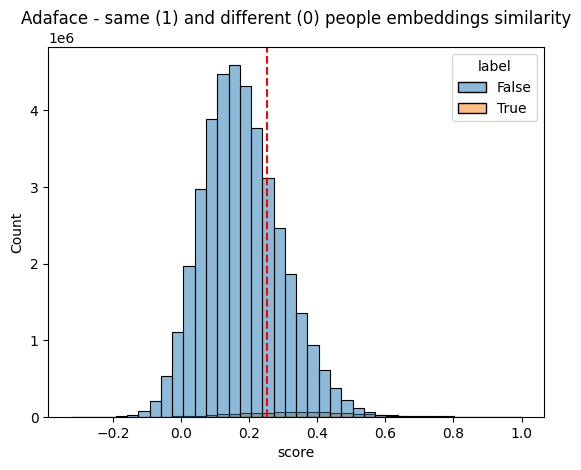

In [164]:
sns.histplot(data = data, x = 'score', hue='label',bins = 40)
plt.title('Adaface - same (1) and different (0) people embeddings similarity')
plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold = {threshold:.2f}')

In [165]:
same_person = data[data['label'] == 1]
diff_person = data[data['label'] == 0]

In [166]:
results_json['test']['similarity_distribution'] = {}

In [167]:
results_json['test']['similarity_distribution']['same_person_mean'] = round(same_person['score'].mean(), 6)
results_json['test']['similarity_distribution']['same_person_std'] = round(same_person['score'].std(), 6)
results_json['test']['similarity_distribution']['diff_person_mean'] = round(diff_person['score'].mean(), 6)
results_json['test']['similarity_distribution']['diff_person_std'] = round(diff_person['score'].std(), 6)

In [168]:
fars=[]
frrs=[]
ground_truth = data['label']
for t in thresholds:
    decisions = data['score'] > t
    FP = np.sum((ground_truth == 0) & (decisions == 1))
    FN = np.sum((ground_truth == 1) & (decisions == 0))
    TP = np.sum((ground_truth == 1) & (decisions == 1))
    TN = np.sum((ground_truth == 0) & (decisions == 0))
    FAR = FP / (FP + TN)
    FRR = FN / (FN + TP)
    fars.append(FAR)
    frrs.append(FRR)


In [169]:
_, eer = calculate_eer(thresholds, fars, frrs)

In [170]:
results_json['test']['metrics']['eer'] = round(eer, 6)

In [171]:
results_json

{'eval': {'similarity_distribution': {'same_person_mean': 0.353044,
   'same_person_std': 0.163064,
   'diff_person_mean': 0.190973,
   'diff_person_std': 0.118811},
  'metrics': {'accuracy': 0.714474,
   'f1': 0.091712,
   'precision': 0.049001,
   'recall': 0.714389,
   'far': 0.285524,
   'frr': 0.285611,
   'eer': 0.285679},
  'threshold': 0.253077},
 'test': {'metrics': {'accuracy': 0.750521,
   'f1': 0.102404,
   'precision': 0.055201,
   'recall': 0.706838,
   'far': 0.248582,
   'frr': 0.293162,
   'eer': 0.273424},
  'similarity_distribution': {'same_person_mean': 0.351903,
   'same_person_std': 0.165881,
   'diff_person_mean': 0.179661,
   'diff_person_std': 0.114449}}}

In [172]:
import json
with open(f"{parent_dir}/results/adaface_aligned.json", "w") as outfile:
    json.dump(results_json, outfile)